(only tested on Python 3.6)

this notebook shows effect of aperture.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from leelabtoolbox.preprocessing import pipeline
from skimage.data import astronaut
import numpy as np
from itertools import product
from skimage import img_as_float

In [2]:
astronaut_img = img_as_float(astronaut())
print(astronaut_img.shape)

(512, 512, 3)


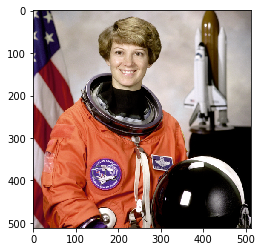

In [3]:
plt.imshow(astronaut_img)

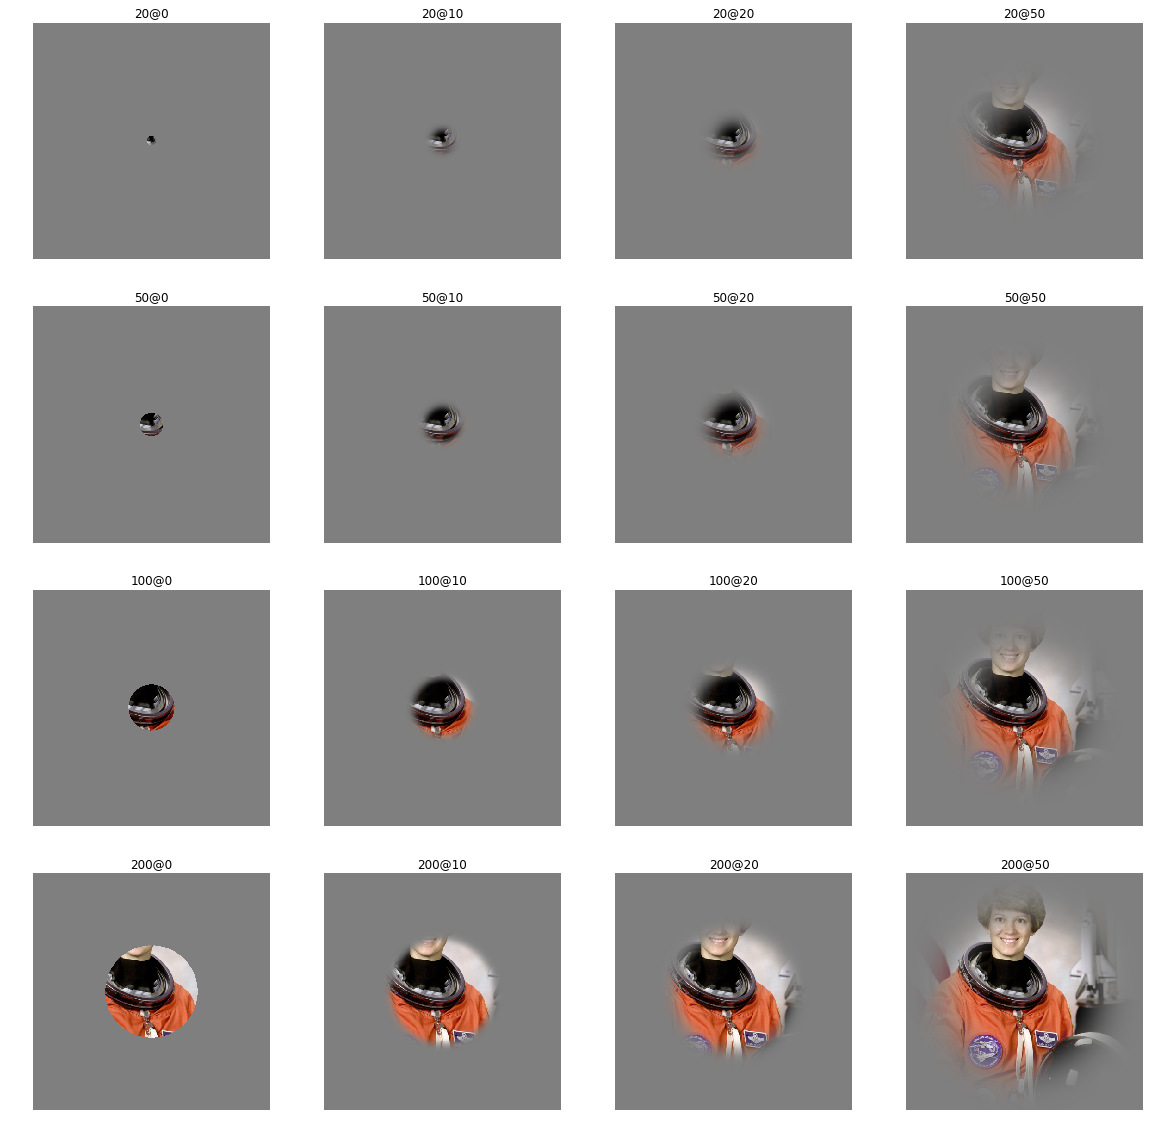

In [4]:
# first, show different aperture size.
aperture_size_list = [20, 50, 100, 200]
gaussian_width_list = [0, 10, 20, 50]

plt.close('all')
fig, axes = plt.subplots(nrows=len(aperture_size_list), ncols=len(gaussian_width_list),
                         squeeze=False, figsize=(20, 20))

for (aperture_idx, aperture_size), (gauss_idx, gaussian_width) in product(enumerate(aperture_size_list),
                                                                          enumerate(gaussian_width_list)):
    
    steps = ['aperture']
    pars = {
        'aperture':{'size': aperture_size,
                      'gaussian_width': gaussian_width,
                      }
    }
    images_process_pipeline, pars_real, order_real = pipeline.preprocessing_pipeline(steps, pars, steps)
    ax = axes[aperture_idx, gauss_idx]
    ax.set_title(f'{aperture_size}@{gaussian_width}')
    ax.imshow(images_process_pipeline.transform(astronaut_img[np.newaxis])[0])
    ax.axis('off')
plt.show()

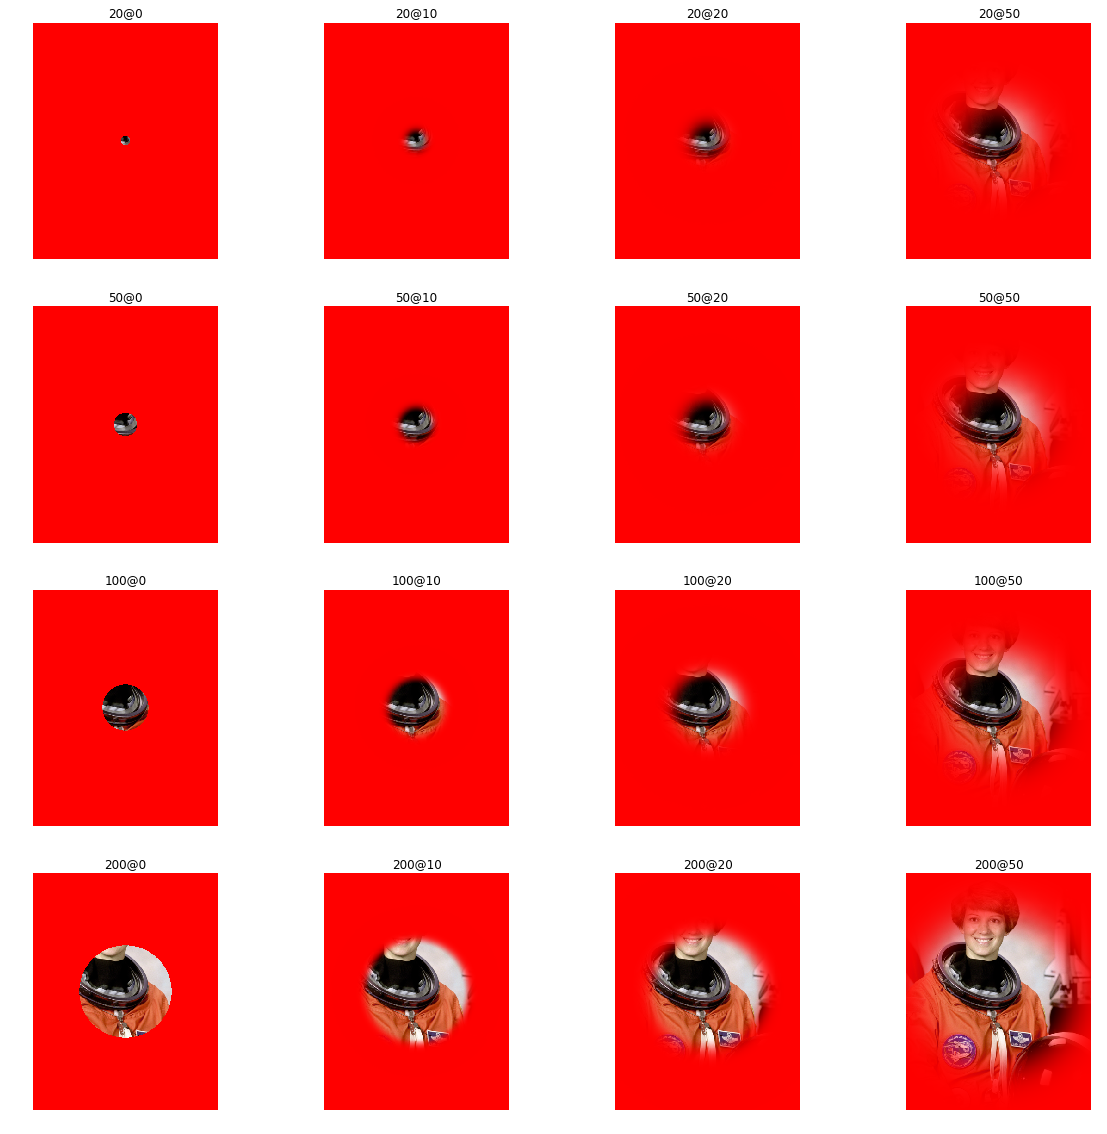

In [5]:
# first, show different aperture size.
# check non square.
selector = (np.newaxis, slice(None), slice(256-200, 256+200))
aperture_size_list = [20, 50, 100, 200]
gaussian_width_list = [0, 10, 20, 50]

plt.close('all')
fig, axes = plt.subplots(nrows=len(aperture_size_list), ncols=len(gaussian_width_list),
                         squeeze=False, figsize=(20, 20))

for (aperture_idx, aperture_size), (gauss_idx, gaussian_width) in product(enumerate(aperture_size_list),
                                                                          enumerate(gaussian_width_list)):
    
    steps = ['aperture']
    pars = {
        'aperture':{'size': aperture_size,
                      'gaussian_width': gaussian_width,
                    'background_color': (1.0, 0, 0) # also, test bg color. this should give red.
                      }
    }
    images_process_pipeline, pars_real, order_real = pipeline.preprocessing_pipeline(steps, pars, steps)
    ax = axes[aperture_idx, gauss_idx]
    ax.set_title(f'{aperture_size}@{gaussian_width}')
    ax.imshow(images_process_pipeline.transform(astronaut_img[selector])[0])
    ax.axis('off')
plt.show()

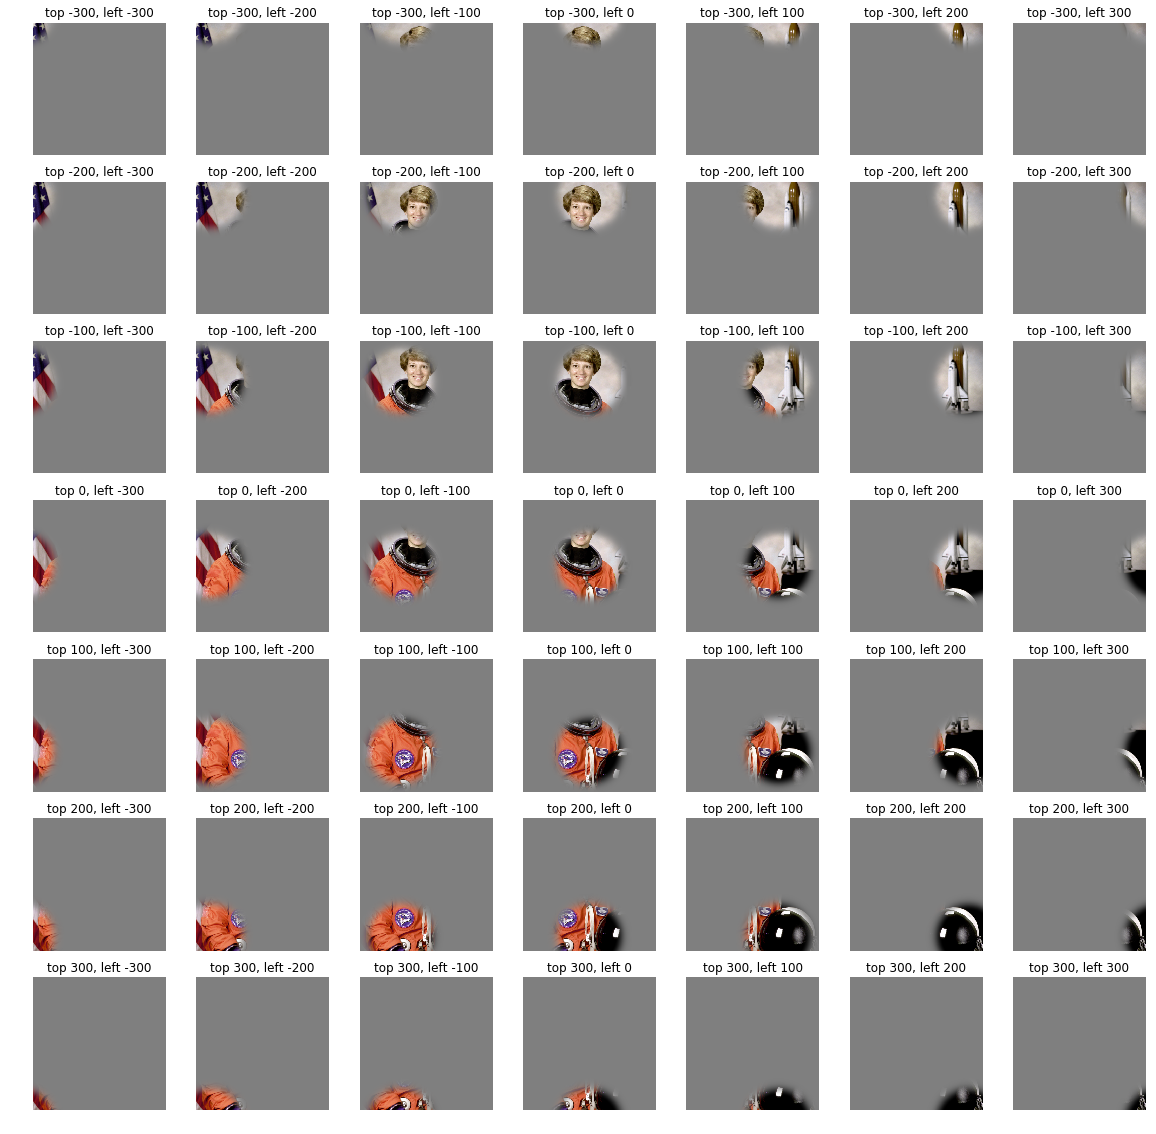

In [ ]:
# then, show different shift.
# notice of of bound is acceptable.
shift_list = [-300, -200, -100, 0, 100, 200, 300]

plt.close('all')
fig, axes = plt.subplots(nrows=len(shift_list), ncols=len(shift_list),
                         squeeze=False, figsize=(20, 20))

for (aperture_idx, aperture_size), (gauss_idx, gaussian_width) in product(enumerate(shift_list),
                                                                          enumerate(shift_list)):
    
    steps = ['aperture']
    pars = {
        'aperture':{'size': 200,
                      'gaussian_width': 20,
                     'shift': (aperture_size, gaussian_width)
                      }
    }
    images_process_pipeline, pars_real, order_real = pipeline.preprocessing_pipeline(steps, pars, steps)
    ax = axes[aperture_idx, gauss_idx]
    ax.set_title(f'top {aperture_size}, left {gaussian_width}')
    ax.imshow(images_process_pipeline.transform(astronaut_img[np.newaxis])[0])
    ax.axis('off')
plt.show()

In [ ]:
# then, show different shift.
# notice of of bound is acceptable.
shift_list = [-300, -200, -100, 0, 100, 200, 300]

plt.close('all')
fig, axes = plt.subplots(nrows=len(shift_list), ncols=len(shift_list),
                         squeeze=False, figsize=(20, 20))

for (aperture_idx, aperture_size), (gauss_idx, gaussian_width) in product(enumerate(shift_list),
                                                                          enumerate(shift_list)):
    
    steps = ['aperture']
    pars = {
        'aperture':{'size': 200,
                      'gaussian_width': 20,
                     'shift': (aperture_size, gaussian_width)
                      }
    }
    images_process_pipeline, pars_real, order_real = pipeline.preprocessing_pipeline(steps, pars, steps)
    ax = axes[aperture_idx, gauss_idx]
    ax.set_title(f'top {aperture_size}, left {gaussian_width}')
    ax.imshow(images_process_pipeline.transform(astronaut_img[selector])[0])
    ax.axis('off')
plt.show()